<a href="https://colab.research.google.com/github/longnguyendata/amazon-reviews-data-analysis/blob/main/Amazon_Reviews_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMAZON REVIEWS DATA ANALYSIS

## INTRODUCTION

In this analysis, we aim to gain valuable insights from Amazon customer reviews data. These insights can help Amazon to optimize its recommendation algorithms and enhance the overall customer experience on their platform.

### Key Business Questions:
1. Who are the high-potential users should Amazon recommend products to?
2. Which products should Amazon prioritize for promotion and recommendation?
3. Is there any difference between purchasing behaviour of frequent buyers and not frequent buyers?
4. Who usually gave more lengthy reviews between frequent and infrequent users?

### Tools and Techniques that I used in this project:
- Python/Pandas
- Viz tools: Matplotlib, Seaborn

## DATASET

The Amazon product reviews dataset can be downloaded on [Kaggle](https://www.kaggle.com/datasets/jillanisofttech/amazon-product-reviews) or my [Google Drive folder](https://drive.google.com/file/d/1MrAR01rv0enisEecyD1P2jinr4fvS_FH/view?usp=sharing).

In this notebook, since the dataset file is large (about 300 MB), I stored the dataset on my personal Google Drive and read the dataset directly from there. If you want to rerun this notebook, please choose a method of reading CSV file based on your preference.

The dataset has the following columns:
- Id — unique identifier for each entry of product reviews
- ProductId — unique identifier for the product
- UserId — unqiue identifier for the user
- ProfileName — name of the users
- HelpfulnessNumerator — number of users who found the review helpful
- HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not (which means a total number of people reacted on the review)
- Score — rating between 1 and 5
- Time — timestamp for the review
- Summary — brief summary (title) of the review
- Text — detailed text of the review

## IMPORTING DATASET AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# Mount Google Drive to your Colab notebook:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Access the dataset file:
import pandas as pd

file_path = '/content/drive/MyDrive/SHARED_FILES/Project- Amazon Reviews Dataset/Reviews.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.shape

(568454, 10)

## DATA CLEANING

### HelpfulnessDenominator vs HelpfulnessNumerator

HelpfulnessDenominator is : people found useful count + people found not so useful count (ie how many people reviewed )
HelpfulnessNumerator is among those how many found it helpful…..consider it like a percentage….

So, from this we can see that HelfulnessNumerator is always less than or equal to HelpfulnesDenominator.

In [8]:
# Check the invalid rows
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


These 2 rows have HelpfulnessNumerator > HelpfulnessDenominator, which are not valid. So we will drop these rows from the DataFrame.

In [9]:
# New dataframe
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
df_valid.shape

(568452, 10)

### Check for duplicate values

No user can type a review for different products on the same exact time. If it is the case, then these rows are duplicated values. So, we will have to remove those duplicated rows.

In [10]:
duplicates = df_valid.duplicated(['UserId','ProfileName','Time','Text']).sum()

print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 174521


In [11]:
# Check the duplicated rows in DataFrame
df_valid[df_valid.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...


In [12]:
# Drop the duplicated rows
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text'])

In [13]:
data.shape

(393931, 10)

### Convert Time data types

In [14]:
# Check values in 'Time' column
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

As we can see, data types in 'Time' column is int64. We have to convert it to datetime type.

In [15]:
# Convert to datetime type
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

The values have 'date' (1970-01-01) and 'time' (00:00:01.303862400). The time by default is in "nano-second" (that's why the unit is "ns"). Letss customize "unit" parameter to get time in second ("s").

In [16]:
data['Time'] = pd.to_datetime(data['Time'] , unit='s')

In [17]:
# Recheck values in 'Time' column
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [18]:
# This is the cleaned DataFrame ready for EDA in the next step
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


## EXPLORATORY DATA ANALYSIS

### 1. Who are the high-potential users should Amazon recommend products to?

The aim of this section is to identify high-potential users on Amazon's platform in order to optimize product recommendations, ultimately driving increased sales and maximizing the effectiveness of the recommendation system.

In [19]:
# Check the data shape
data.shape

(393931, 10)

In [20]:
# Check the column names
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [21]:
# The 'ProfileName' column contains usernames who put reviews/ratings on Amazon
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

Note that the Profile-Name could be the same but UserID must be unique for each individual customer. Let's consider the quantity of both ProfileName and UserID in the dataset.

In [22]:
unique_name = data['ProfileName'].nunique()

print(f"The total unique Profile Name is: {unique_name}")

The total unique Profile Name is: 218416


In [23]:
unique_id = data['UserId'].nunique()

print(f"The total unique User ID is: {unique_id}")

The total unique User ID is: 256059


**Remarks:** As mentioned earlier, while the Profile-Name may be the same, each individual customer has a unique UserID. Consequently, we will group and analyze additional attributes, such as reviews, ratings, and products reviewed, based on the **UserID**.

For each unique UserID, we want to know:
- The total number of review summary ('Summary' column)
- The total number of review text ('Text' column)
- The average ratings ('Score' column)
- The total number of products purchased ('ProductId' column)

In [24]:
# Create a new DataFrame using 'groupby' function to group data and '.agg' to aggregate each column in the grouped data
agg_data = data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'})
agg_data

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [25]:
# Sort the customers based on the total number of products purchased
recommend_df = agg_data.sort_values(by='ProductId', ascending=False)
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


With 'UserId' set as the index of the DataFrame, we want to rename other columns.

In [26]:
# Rename columns
recommend_df.columns = ['Number_of_summaries' , 'Number_of_text' , 'Avg_score' , 'No_of_Products_purchased']

recommend_df

,Number_of_summaries,Number_of_text,Avg_score,No_of_Products_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [27]:
# Find top 10 users based on number of products purchased
top_10_user = recommend_df.head(10)
top_10_user

,Number_of_summaries,Number_of_text,Avg_score,No_of_Products_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
A2MUGFV2TDQ47K,161,161,3.826087,161
A3D6OI36USYOU1,146,146,4.417808,146
AZV26LP92E6WU,129,129,4.852713,129
AKMEY1BSHSDG7,119,119,4.747899,119


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

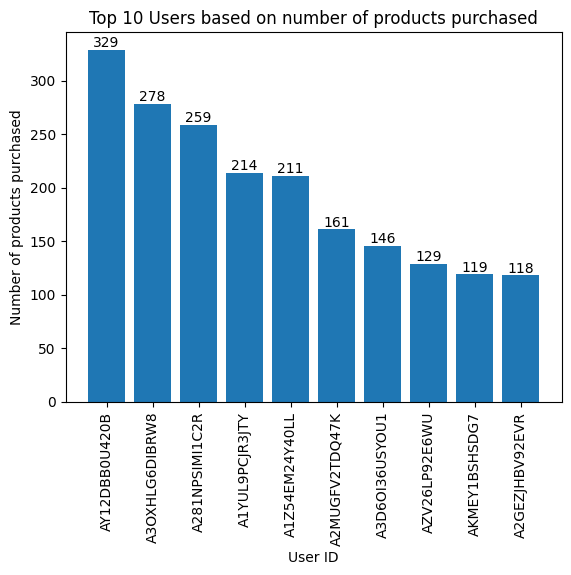

In [80]:
fig, ax = plt.subplots()

x = top_10_user.index
y = top_10_user['No_of_Products_purchased']

bars = ax.bar(x, y)

ax.set_xlabel('User ID')
ax.set_ylabel('Number of products purchased')
ax.set_title('Top 10 Users based on number of products purchased')

plt.xticks(rotation='vertical')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Save the plot as an image
plt.savefig('top_10_users.png')
# Download the image
from google.colab import files
files.download('top_10_users.png')

plt.show()

**Remarks:** These are the top 10 users we can target with more product recommendations, as they have a high probability of making additional purchases.

### 2. Which products should Amazon prioritize for promotion and recommendation?

In order to know which highly-reviewed products  Amazon should prioritize for promotion and recommendation, we first need to know which product has the highest number of reviews and rating scores.

In [31]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [32]:
# Check the unique products that have been sold in the dataset
len(data['ProductId'].unique())

67624

We can see that there are 67624 types of products in the dataset.

Out of 67,624 products, let's find the best-selling item for analysis. But a question arises: What's the minimum number of units sold to be considered a high-potential product?

In reality, the minimum number of units sold to be considered a high-potential product can vary depending on the specific industry, market conditions, and company goals. There is no universal threshold as it can differ from one business to another. In this project, I will rank products based on review count and focus on the top-performing ones.

In [33]:
# Count the quantity of products sold and make a new DataFrame from this list
product_count = data['ProductId'].value_counts().to_frame()

product_count

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1
B009858H6M,1


The products are ranked from the most quantity sold to the least. From the DataFrame, we can choose the threshold of 500 units sold as the minimum number above which they are the top-performing products to prioritize.

In [34]:
# List the products which have the number of units sold > 500 units
product_count[product_count['ProductId'] > 500]

,ProductId
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541
B0090X8IPM,530


In [35]:
freq_prod_ids = product_count[product_count['ProductId']>500].index

freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

These products shown above are the top-performing ones since they have more than 500 units sold in the dataset.

In [36]:
# Filter the original DataFrame with only those top-performing products selected
freq_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

freq_prod_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...


In [37]:
freq_prod_df.shape

(6504, 10)

#### Plot the products based on the units sold

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

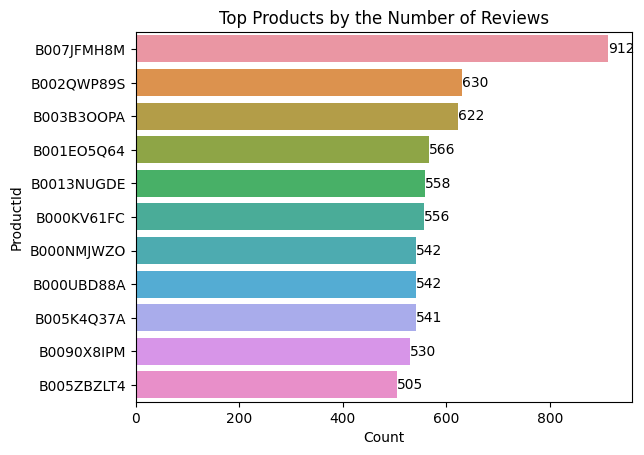

In [81]:
# Plot the new DataFrame of top-performing products in Seaborn

# Create the countplot
ax = sns.countplot(y='ProductId',
                   data=freq_prod_df,
                   order=freq_prod_df['ProductId'].value_counts().index)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2), ha = 'left', va = 'center')

# Set plot aesthetics
plt.xlabel('Count')
plt.ylabel('ProductId')
plt.title('Top Products by the Number of Reviews')

# Save the plot as an image
plt.savefig('top_products_by_reviews.png')
# Download the image
from google.colab import files
files.download('top_products_by_reviews.png')

# Show the plot
plt.show()

In [39]:
freq_prod_df['ProductId'].value_counts().index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000NMJWZO', 'B000UBD88A', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object')

**Remarks:** These 5 products have the highest quantity of units sold: 'B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE'.

####Plot the products based on the ratings

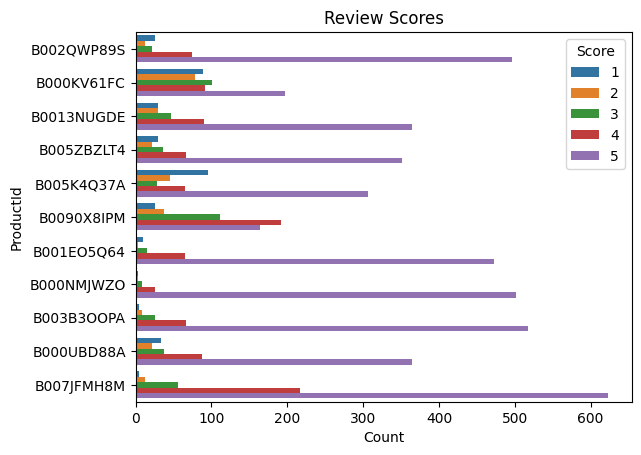

In [40]:
sns.countplot(y = 'ProductId' ,
                   data = freq_prod_df ,
                   hue='Score')

# Set plot aesthetics
plt.xlabel('Count')
plt.ylabel('ProductId')
plt.title('Review Scores')

# Show the plot
plt.show()

Note that the products in the y-axis are not sorted properly, so it's hard to know which products need to be focused. I will sort the products on the y-axis based the highest quantity of 5-star rating scores. Let's look into the following code.

In [41]:
# Filter the dataframe for 'Score' = 5 (5-star rating only)
score_5_df = freq_prod_df[freq_prod_df['Score'] == 5]

# Count the occurrences of 'Score' = 5 for each product
score_5_counts = score_5_df['ProductId'].value_counts().sort_values(ascending=False)

score_5_counts

B007JFMH8M    623
B003B3OOPA    517
B000NMJWZO    502
B002QWP89S    497
B001EO5Q64    473
B0013NUGDE    364
B000UBD88A    364
B005ZBZLT4    351
B005K4Q37A    307
B000KV61FC    197
B0090X8IPM    164
Name: ProductId, dtype: int64

The list above shows the products that have the most quantity of 5-star ratings.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

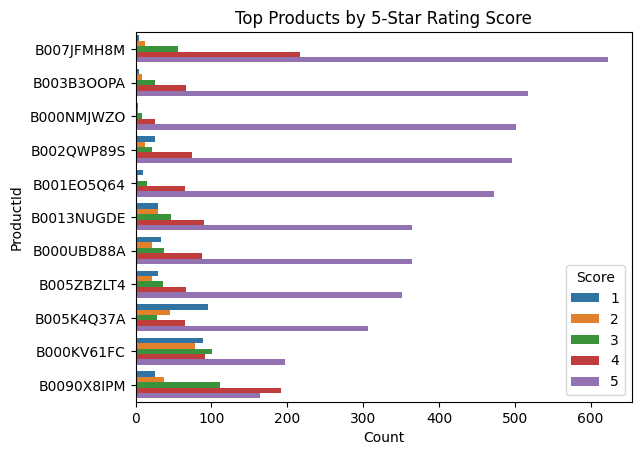

In [82]:
# Create a countplot using Seaborn
sns.countplot(y = 'ProductId',
              data = freq_prod_df,
              hue = 'Score',
              order = score_5_counts.index)

plt.xlabel('Count')
plt.ylabel('ProductId')
plt.title('Top Products by 5-Star Rating Score')

# Save the plot as an image
plt.savefig('top_products_by_5star_rating.png')
# Download the image
from google.colab import files
files.download('top_products_by_5star_rating.png')

plt.show()

In [43]:
score_5_counts.index

Index(['B007JFMH8M', 'B003B3OOPA', 'B000NMJWZO', 'B002QWP89S', 'B001EO5Q64',
       'B0013NUGDE', 'B000UBD88A', 'B005ZBZLT4', 'B005K4Q37A', 'B000KV61FC',
       'B0090X8IPM'],
      dtype='object')

**Remarks:** These 5 products have the highest quantity of 5-star ratings: 'B007JFMH8M', 'B003B3OOPA', 'B000NMJWZO', 'B002QWP89S', 'B001EO5Q64'.

Notice how the rank of these 5-star rated products is different from that of the best-selling products shown above.

### 3. Is there any difference between purchasing behaviour of frequent buyers and not frequent buyers?

In [44]:
# Review the 'data' DataFrame
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [45]:
# Count the reviews/purchases of each specific user
x = data['UserId'].value_counts()
x

# note: the Series 'x' has the unique 'UserId' values as the index and the counts as the values

AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [46]:
# Create a new column 'user_type' which categorized into Frequent and Not Frequent
data['user_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user] > 50 else "Not Frequent")

In [47]:
# Check the new column in the DataFrame
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,user_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [48]:
# Recheck the user_type
data['user_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

Next, I will divide the 'data' DataFrame into 2 small DF: 'Frequent' and 'Not Frequent'.

In [49]:
freq_df = data[data['user_type'] == 'Frequent']
not_freq_df = data[data['user_type'] == 'Not Frequent']

In [50]:
# Show the number of rows in each new DataFrame
print(f"The number of rows in freq_df is {len(freq_df)}")
print(f"The number of rows in not_freq_df is {len(not_freq_df)}")

The number of rows in freq_df is 9358
The number of rows in not_freq_df is 384573


In [51]:
# Check the number of ratings in 'freq_df' dataframe
freq_df['Score'].value_counts()

5    5765
4    1979
3     897
2     368
1     349
Name: Score, dtype: int64

In [52]:
# Frequency of each rating score in the DataFrame
freq_df['Score'].value_counts()/len(freq_df)*100

5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: Score, dtype: float64

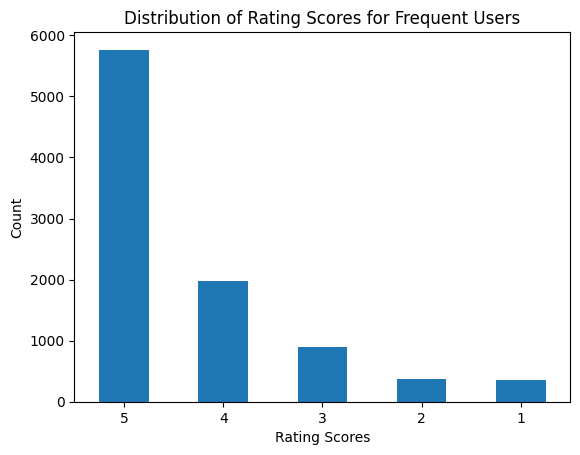

In [53]:
# Plot the frequency in this df
freq_df['Score'].value_counts().plot(kind='bar')

plt.xlabel('Rating Scores')
plt.ylabel('Count')
plt.title('Distribution of Rating Scores for Frequent Users')
plt.xticks(rotation='horizontal')

plt.show()

In [54]:
# Similar for the 'not_freq_df'
not_freq_df['Score'].value_counts()

5    245196
4     54114
1     35957
3     28872
2     20434
Name: Score, dtype: int64

In [55]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: Score, dtype: float64

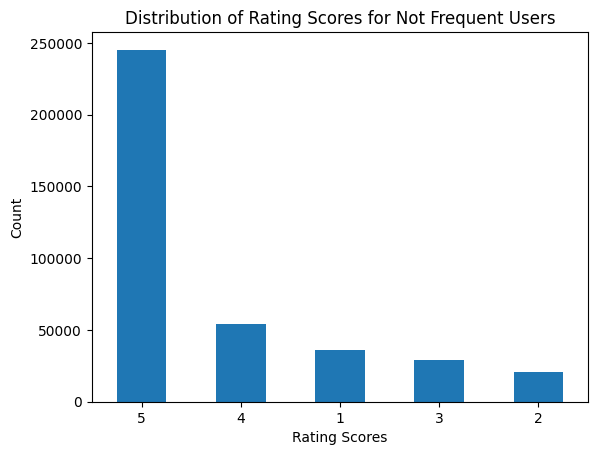

In [56]:
not_freq_df['Score'].value_counts().plot(kind='bar')

plt.xlabel('Rating Scores')
plt.ylabel('Count')
plt.title('Distribution of Rating Scores for Not Frequent Users')
plt.xticks(rotation='horizontal')

plt.show()

Now, I will combine these 2 subplots above into 1 plot so that we can compare the frequency of rating scores between 2 user groups.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

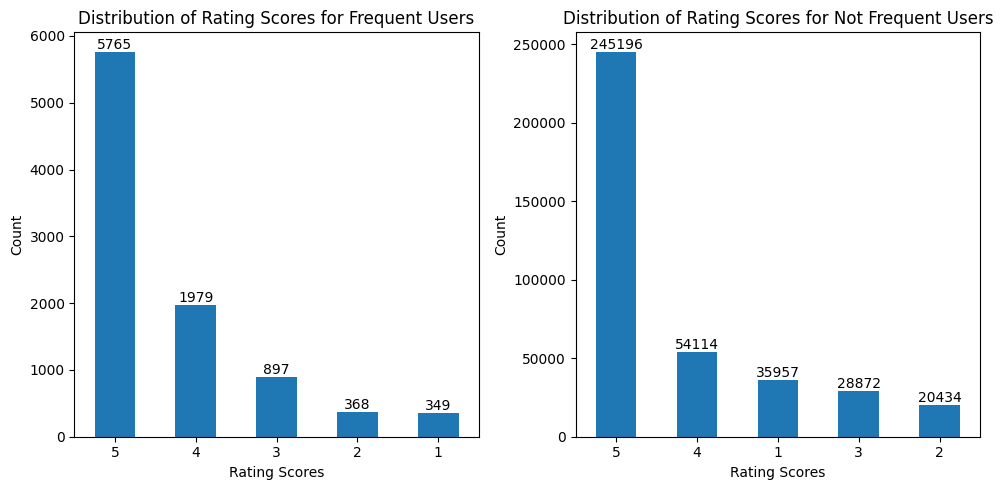

In [87]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Distribution of Rating Scores for Frequent Users
freq_counts = freq_df['Score'].value_counts()
freq_counts.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Rating Scores')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Rating Scores for Frequent Users')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='horizontal')

# Add value labels in Plot 1
for i, v in enumerate(freq_counts):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Plot 2: Distribution of Rating Scores for Not Frequent Users
not_freq_counts = not_freq_df['Score'].value_counts()
not_freq_counts.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Rating Scores')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Rating Scores for Not Frequent Users')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation='horizontal')

# Add value labels in Plot 2
for i, v in enumerate(not_freq_counts):
    ax2.text(i, v, str(v), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot as an image
plt.savefig('distribution_ratings.png')
# Download the image
from google.colab import files
files.download('distribution_ratings.png')

# Show the combined plot
plt.show()


**Remarks:**
- Based on the distribution plots, the distribution of ratings among frequent reviewers closely aligns with the overall distribution of infrequent reviews. E.g. 61.6% vs. 63.7% of 5-star ratings for frequent and infrequent users respectively.
- However, it is noticeable that frequent reviewers tend to give fewer 5-star and 1-star ratings compared to infrequent users. E.g. For 5-star ratings, frequent users only gave 5765 ratings, whereas the infrequent users contributed 245196 ratings.
- This suggests that frequent users demonstrate a more discerning approach, giving fewer extreme ratings than infrequent users.

### 4. Who usually gave more lengthy reviews between frequent and infrequent users?

You may ask: "Why do review length matter?"

By comparing review lengths between frequent and infrequent users, we uncover valuable insights into the depth and quality of customer feedback. It helps us understand the level of detail, specificity, and overall engagement from different user groups.

In [57]:
# Check the column 'Text' which has the detailed reviews
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

We only focus on the following columns:
- UserId: Who gave the reviews?
- ProductId: Users gave reviews about which product?
- Text: What did the user comment?

In [58]:
data[['UserId' , 'ProductId' , 'Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [59]:
# Let's check the first review
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [60]:
# Check the data type of 'Text' column
type(data['Text'][0])

str

It is obvious that the data type in 'Text' column is string. So, wecan split the string data in order to convert it into a list of words.

In [61]:
data['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [62]:
# Recheck the data type after splitting
type(data['Text'][0].split(' '))

list

In [63]:
# Number of words in this list after splitting
len(data['Text'][0].split(' '))

49

In [64]:
# Define a function to calculate the length of text by splitting it into words and counting the number of words
def calculate_length(text):
    return len(text.split(' '))

In [65]:
# Apply this function to each value in the 'Text' column and assign the result to a new column called 'Text_length'
data['Text_length'] = data['Text'].apply(calculate_length)

In [66]:
# View the new column added
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,user_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30


In [67]:
# Similar to the task above, we can split the DataFrame into 2 small groups
freq_df = data[data['user_type'] == 'Frequent']
not_freq_df = data[data['user_type'] == 'Not Frequent']

In [68]:
not_freq_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,user_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30


In [69]:
# Show the number of rows in each new DataFrame
print(f"The number of rows in freq_df is {len(freq_df)}")
print(f"The number of rows in not_freq_df is {len(not_freq_df)}")

The number of rows in freq_df is 9358
The number of rows in not_freq_df is 384573


To compare the text length frequency between two user groups (Frequent and Not Frequent), we will analyze the statistics of the 'Text_length' column.

In [70]:
# Check the statstics for Frequent Users
freq_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text_length
count,9358.000000,9358.000000,9358.000000,9358.000000,9358.000000
mean,266722.476063,2.334580,2.743001,4.329664,148.458966
std,167281.494173,5.609209,6.149894,1.047039,126.195802
min,15.000000,0.000000,0.000000,1.000000,13.000000
25%,112715.750000,0.000000,0.000000,4.000000,72.000000
50%,264579.500000,1.000000,1.000000,5.000000,115.000000
75%,409845.250000,2.000000,3.000000,5.000000,185.000000
max,568368.000000,128.000000,152.000000,5.000000,1766.000000


In [71]:
freq_df['Text_length'].median()

115.0

In [72]:
# Check the statstics for Not Frequent Users
not_freq_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text_length
count,384573.000000,384573.000000,384573.000000,384573.000000,384573.000000
mean,261227.481287,1.719788,2.191709,4.175740,79.946988
std,167025.056076,6.899490,7.564861,1.317497,76.395272
min,1.000000,0.000000,0.000000,1.000000,3.000000
25%,112681.000000,0.000000,0.000000,4.000000,34.000000
50%,248461.000000,0.000000,1.000000,5.000000,57.000000
75%,407101.000000,2.000000,2.000000,5.000000,98.000000
max,568454.000000,866.000000,923.000000,5.000000,3526.000000


In [73]:
not_freq_df['Text_length'].median()

57.0

Next, we will utilize box-whisker plots to visualize the statistics.

Note that the box-whisker plots can show the 25th percentile, 50th percentile (median, not mean or average), and 75th percentile of the data.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

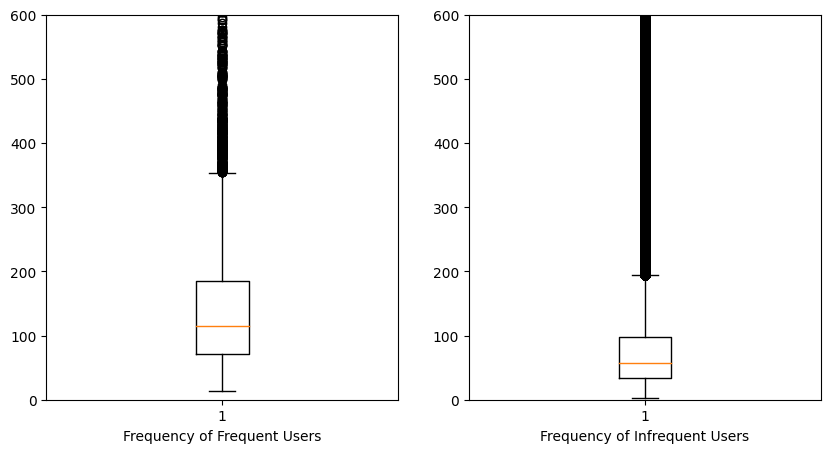

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.boxplot(freq_df['Text_length'])
ax1.set_xlabel('Frequency of Frequent Users')
ax1.set_ylim(0, 600)

ax2.boxplot(not_freq_df['Text_length'])
ax2.set_xlabel('Frequency of Infrequent Users')
ax2.set_ylim(0, 600)

# Save the plot as an image
plt.savefig('box_plots.png')
# Download the image
from google.colab import files
files.download('box_plots.png')

plt.show()

**Remarks:** From the box plots, we can see that the
infrequent reviewers tend to write shorter reviews, while frequent reviewers focus on longer reviews. In details, the median text length for frequent users is 115 words, whereas infrequent users have a median length of only 57 words.

Furthermore, the box size in the box plot reveals that frequent users tend to have a concentration of longer reviews, with a range spanning from 72 to 185 words between the 25th and 75th percentiles. On the other hand, infrequent users exhibit a concentration of shorter reviews, ranging from 34 to 98 words between the 25th and 75th percentiles.

## CONCLUSIONS

From this project, we can have some conclusions based on the observations above:
- Targeting the most review-writing users with more product recommendations increases the likelihood of additional purchases, since they have shown a higher probability of engagement and conversion.
- Prioritizing highly-reviewed products for promotion maximizes the impact of recommendations, boosting sales due to their positive reception among customers.
- Frequent users provide fewer extreme ratings, indicating a more thoughtful and balanced evaluation process, leading to more reliable feedback.
- Review length differs between infrequent and frequent reviewers, with infrequent users writing shorter reviews and frequent users providing more detailed and comprehensive feedback.

By leveraging these insights, Amazon can optimize its recommendation algorithms, target high-potential users, promote highly-reviewed products, and enhance the overall customer experience on their platform.